In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings       
import pickle
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import xgboost as xgb
from mytools import encontrar_estacao, cortar_serie_temporal, remover_outliers_boxplot, remover_outliers_stddeviation
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

ImportError: cannot import name 'remover_outliers_boxplot' from 'mytools' (/home/jaca/Área de trabalho/darth vader/Python/mytools.py)

In [7]:
df = pd.read_csv('dados_A215_H_2008-06-13_2024-01-01.csv',sep= ';', header = 9)
df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])
df['Hora Medicao'] = pd.to_datetime(df['Hora Medicao'])
df['ano'] = df['Data Medicao'].dt.year
df['mes'] = df['Data Medicao'].dt.month
df['dia'] = df['Data Medicao'].dt.day
# df['hora']= df['Hora Medicao'].str[-4:-2].astype(int)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.').astype(float)


df['Hora Medicao'] = df['Hora Medicao'].astype(str)
df['hora'] = df['Hora Medicao'].str[-4:-2].astype(int)
df = df.drop(['Hora Medicao'],axis=1)
df['hora'] = pd.to_timedelta(df['hora'], unit='h') - pd.Timedelta(hours=3)
df['Data_Hora'] = df['Data Medicao'] + df['hora']
df.set_index('Data_Hora', inplace=True)
df['Data_Hora'] = df['Data Medicao'] + df['hora']
df = df.drop('Unnamed: 22', axis =1)
df['estacao'] = df.apply(encontrar_estacao, axis=1)


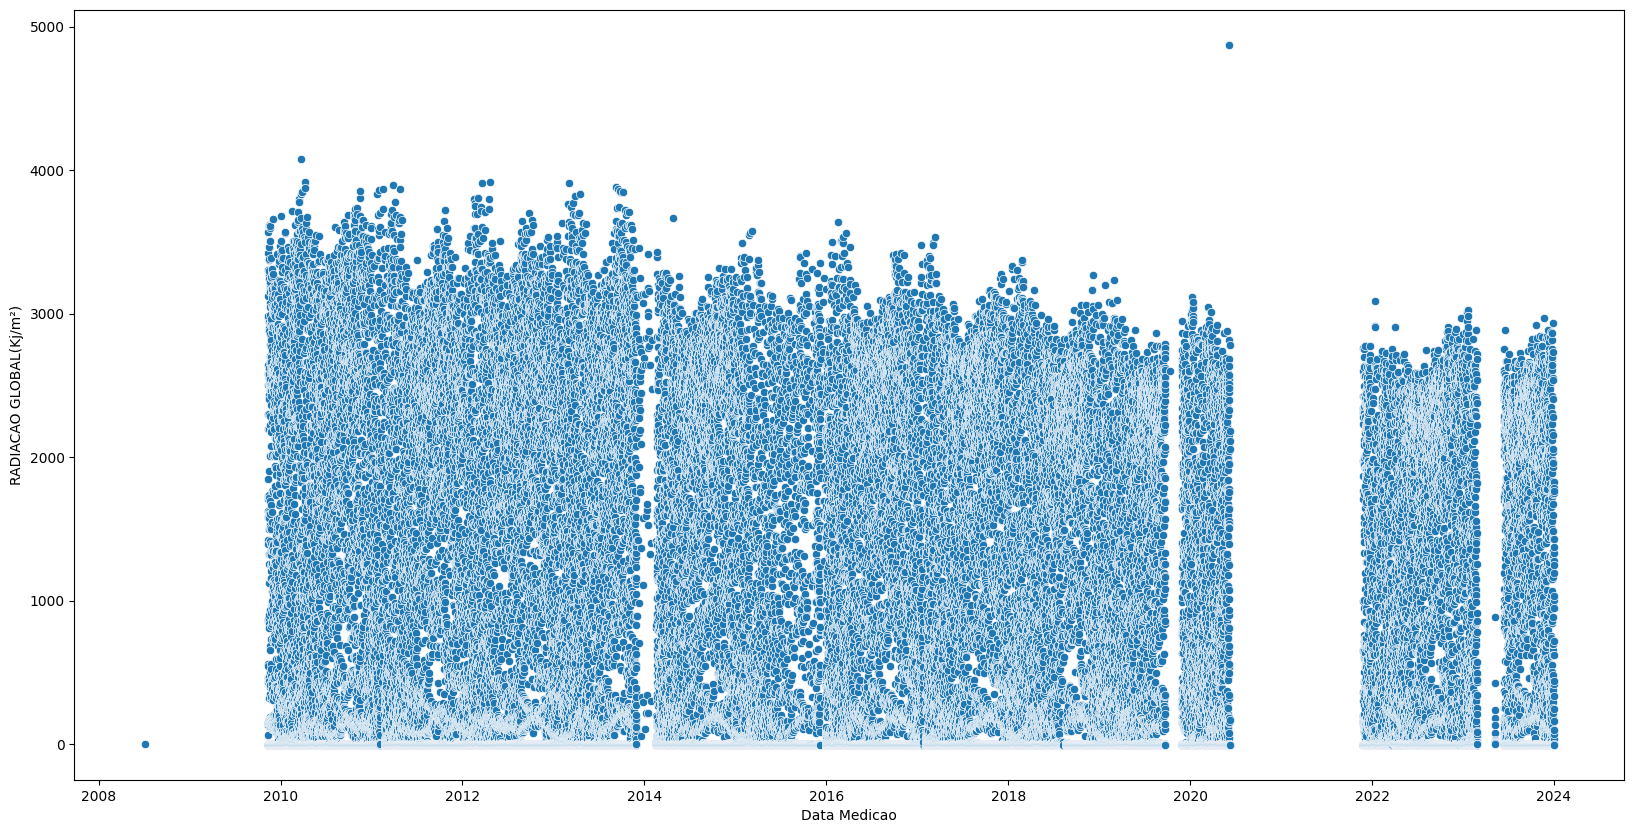

In [10]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Data Medicao',y="RADIACAO GLOBAL(Kj/m²)", data= df)
plt.savefig('radiacao.png')
plt.show()

In [ ]:
df = df.dropna()

df_crop = cortar_serie_temporal(df = df,data_inicio = '2010-01-01', data_fim = '2020-12-31')

df = remover_outliers(df_crop)
df.to_csv('cropped.csv')
scaler = MinMaxScaler()

features = ['TEMPERATURA DO PONTO DE ORVALHO(°C)','VENTO, VELOCIDADE HORARIA(m/s)', 'UMIDADE RELATIVA DO AR, HORARIA(%)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)']
target = ['RADIACAO GLOBAL(Kj/m²)']
dataframe = df
X = dataframe[features].values
y = dataframe[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scalfrom sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_spliter.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
class TimeSeriesCutter(BaseEstimator, TransformerMixin):
    def __init__(self, data_inicio, data_fim):
        self.data_inicio = data_inicio
        self.data_fim = data_fim

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return cortar_serie_temporal(df=X, data_inicio=self.data_inicio, data_fim=self.data_fim)

# Custom transformer for removing outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return remover_outliers(X)


In [ ]:


class LinearRegressionImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target_col):
        self.target_col = target_col
        self.model = LinearRegression()

    def fit(self, X, y=None):
        self.complete_cases = X.dropna(subset=[self.target_col])
        self.model.fit(self.complete_cases.drop(columns=[self.target_col]), self.complete_cases[self.target_col])
        return self

    def transform(self, X):
        missing_mask = X[self.target_col].isna()
        X.loc[missing_mask, self.target_col] = self.model.predict(X.loc[missing_mask].drop(columns=[self.target_col]))
        return X

class KernelRidgeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target_col):
        self.target_col = target_col
        self.model = KernelRidge()

    def fit(self, X, y=None):
        self.complete_cases = X.dropna(subset=[self.target_col])
        self.model.fit(self.complete_cases.drop(columns=[self.target_col]), self.complete_cases[self.target_col])
        return self

    def transform(self, X):
        missing_mask = X[self.target_col].isna()
        X.loc[missing_mask, self.target_col] = self.model.predict(X.loc[missing_mask].drop(columns=[self.target_col]))
        return X

class RandomForestImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target_col):
        self.target_col = target_col
        self.model = RandomForestRegressor()

    def fit(self, X, y=None):
        self.complete_cases = X.dropna(subset=[self.target_col])
        self.model.fit(self.complete_cases.drop(columns=[self.target_col]), self.complete_cases[self.target_col])
        return self

    def transform(self, X):
        missing_mask = X[self.target_col].isna()
        X.loc[missing_mask, self.target_col] = self.model.predict(X.loc[missing_mask].drop(columns=[self.target_col]))
        return X

class SVMImputer(BaseEstimator, TransformerMixin):
    def __init__(self, target_col):
        self.target_col = target_col
        self.model = SVR()

    def fit(self, X, y=None):
        self.complete_cases = X.dropna(subset=[self.target_col])
        self.model.fit(self.complete_cases.drop(columns=[self.target_col]), self.complete_cases[self.target_col])
        return self

    def transform(self, X):
        missing_mask = X[self.target_col].isna()
        X.loc[missing_mask, self.target_col] = self.model.predict(X.loc[missing_mask].drop(columns=[self.target_col]))
        return X


In [ ]:
class MultiColumnImputer(BaseEstimator, TransformerMixin):
    def __init__(self, model, target_cols):
        self.model = model
        self.target_cols = target_cols
        self.models = {}

    def fit(self, X, y=None):
        # Train a model for each target column
        for col in self.target_cols:
            self.models[col] = clone(self.model)
            complete_cases = X.dropna(subset=[col])
            self.models[col].fit(complete_cases.drop(columns=[col]), complete_cases[col])
        return self

    def transform(self, X):
        # Apply the trained models to fill missing values
        X = X.copy()
        for col in self.target_cols:
            missing_mask = X[col].isna()
            X.loc[missing_mask, col] = self.models[col].predict(X.loc[missing_mask].drop(columns=self.target_cols))
        return X


# Lista de pipelines para gerenciamento do projeto onde temos a remoção ou imputação dos valores nulos, assim como a remoção ou não de outliers # 
## Lembrete: Após avaliar o desempesnho dos modelos com os pipelines inserir a remoção ou não dos valores noturnos ##

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


impute_columns = ['RADIACAO GLOBAL(Kj/m²)', 'TEMPERATURA DO PONTO DE ORVALHO(°C)', 'VENTO, VELOCIDADE HORARIA(m/s)',
                  'UMIDADE RELATIVA DO AR, HORARIA(%)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)']

# Define the preprocessing choices
preprocessing_options = [
    {'name': 'dropna_remove_outliers', 
     'pipeline': Pipeline([
         ('dropnar', 'drop'), 
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')), 
         ('remove_outliers', OutlierRemover()), 
         ('scaler', StandardScaler())])},
    
    {'name': 'dropna_no_remove_outliers', 
     'pipeline': Pipeline([
         ('dropnar', 'drop'), 
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')), 
         ('remove_outliers', 'passthrough'), 
         ('scaler', StandardScaler())])},
    
    {'name': 'median_remove_outliers', 
     'pipeline': Pipeline([
         ('imputer', SimpleImputer(strategy='median')), 
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')), 
         ('remove_outliers', OutlierRemover()), 
         ('scaler', StandardScaler())])},
    
    {'name': 'median_no_remove_outliers', 
     'pipeline': Pipeline([
         ('imputer', SimpleImputer(strategy='median')), 
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')), 
         ('remove_outliers', 'passthrough'), 
         ('scaler', StandardScaler())])},
    
    {'name': 'linear_regression_impute_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(LinearRegression(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', OutlierRemover()),
         ('scaler', StandardScaler())])},

    {'name': 'kernel_ridge_impute_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(KernelRidge(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', OutlierRemover()),
         ('scaler', StandardScaler())
     ])},

    {'name': 'random_forest_impute_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(RandomForestRegressor(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', OutlierRemover()),
         ('scaler', StandardScaler())
     ])},

    {'name': 'svm_impute_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(SVR(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', OutlierRemover()),
         ('scaler', StandardScaler())
     ])},

    {'name': 'knn_impute_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', KNNImputer(n_neighbors=3)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', OutlierRemover()),
         ('scaler', StandardScaler())
     ])},
    {'name': 'linear_regression_impute_no_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(LinearRegression(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', passthrough),
         ('scaler', StandardScaler())])},

    {'name': 'kernel_ridge_impute_no_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(KernelRidge(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', passthrough),
         ('scaler', StandardScaler())
     ])},

    {'name': 'random_forest_impute_no_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(RandomForestRegressor(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', passthrough),
         ('scaler', StandardScaler())
     ])},

    {'name': 'svm_impute_no_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', MultiColumnImputer(SVR(), target_cols=impute_columns)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', passthrough),
         ('scaler', StandardScaler())
     ])},

    {'name': 'knn_impute_no_remove_outliers',
     'pipeline': Pipeline([
         ('imputer', KNNImputer(n_neighbors=3)),
         ('cut_series', TimeSeriesCutter(data_inicio='2010-01-01', data_fim='2020-12-31')),
         ('remove_outliers', passthrough),
         ('scaler', StandardScaler())
     ])}]

# Iterate over each preprocessing option and apply it
# for option in preprocessing_options:
#     pipeline = Pipeline(option['steps'])
    
#     # Apply the pipeline
#     df_processed = pipeline.fit_transform(df)
    
#     # Save the processed data with a descriptive name
#     filename = f"{option['name']}.csv"
#     df_processed.to_csv(filename, index=False)
    
    # Optionally, perform model training/testing here...
### for option in preprocessing_pipelines:
##     print(f"Processing with {option['name']}")
# #    df_processed = option['pipeline'].fit_transform(df)
#  #   filename = f"{option['name']}.csv"
#   #  df_processed.to_csv(filename, index=False) 
    


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import joblib
import os
import tensorflow as tf

# Define the models
models = {
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse'),
    'NeuralNetwork': Sequential([
        Dense(64, input_dim=None, activation='relu'),  # Input dimension will be set dynamically
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer
    ])
}

# Compile the neural network model
models['NeuralNetwork'].compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Create a directory to save models if it does not exist
os.makedirs('saved_models', exist_ok=True)

# Iterate over each preprocessing option
for option in preprocessing_pipelines:
    print(f"Processing with {option['name']}")
    
    try:
        # Apply the pipeline to preprocess the data
        df_processed = option['pipeline'].fit_transform(df)
        
        # Save the processed data with a descriptive name
        filename = f"{option['name']}.csv"
        df_processed.to_csv(filename, index=False)
        
        # Split data into features and target
        X = df_processed['RADIACAO GLOBAL(Kj/m²)']
        y = df_processed.drop(columns = ['RADIACAO GLOBAL(Kj/m²)'])
        
        # Split data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize features for SVR and Neural Network
        X_train_scaled = StandardScaler().fit_transform(X_train)
        X_test_scaled = StandardScaler().transform(X_test)
        
        # Update input dimension for Neural Network
        models['NeuralNetwork'].pop(0)
        models['NeuralNetwork'].add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

        # Iterate over each model
        for model_name, model in models.items():
            print(f"Training {model_name} with {option['name']}")
            
            if model_name == 'NeuralNetwork':
                # Train the neural network
                history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)
                loss = model.evaluate(X_test_scaled, y_test)
                print(f"{model_name} test loss (MSE): {loss}")
                y_pred = model.predict(X_test_scaled).flatten()
                
                # Save the neural network model
                model_save_path = os.path.join('saved_models', f"{option['name']}_{model_name}.keras")
                model.save(model_save_path)
                print(f"Neural Network model saved as {model_save_path}")
            else:
                # Define hyperparameters for model tuning
                param_grid = {}
                if model_name == 'SVR':
                    param_grid = {
                        'kernel': ['linear', 'rbf'],
                        'C': [0.001, 0.1, 1, 10],
                        'epsilon': [0.01, 0.1, 0.5]
                    }
                elif model_name == 'RandomForest':
                    param_grid = {
                        'n_estimators': [100, 200, 300, 1000],
                        'max_depth': [None, 10, 20],
                        'min_samples_split': [2, 5, 10]
                    }
                elif model_name == 'XGBoost':
                    param_grid = {
                        'max_depth': [3, 5, 7],
                        'eta': [0.01, 0.1, 0.3],
                        'objective': ['reg:squarederror']
                    }

                # Perform grid search if parameters are defined
                if param_grid:
                    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
                    grid_search.fit(X_train, y_train)
                    best_model = grid_search.best_estimator_
                else:
                    best_model = model.fit(X_train, y_train)
                
                # Predict and evaluate
                y_pred = best_model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                print(f"{model_name} test MSE: {mse}")

                # Save the scikit-learn or XGBoost model
                model_save_path = os.path.join('saved_models', f"{option['name']}_{model_name}.pkl")
                joblib.dump(best_model, model_save_path)
                print(f"{model_name} model saved as {model_save_path}")

    except Exception as e:
        print(f"An error occurred while processing with {option['name']}: {e}")

print("All preprocessing pipelines and model trainings have been executed.")


In [ ]:
svr = SVR()
# Definindo os parâmetros para GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.001, 0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

# Realizando a busca em grade para encontrar os melhores parâmetros
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros para SVR:", grid_search_svr.best_params_)

# Avaliação do modelo
svr_best = grid_search_svr.best_estimator_
svr_best.fit(X_train_scaled, y_train)
svr_pred = svr_best.predict(X_test_scaled)


print("svr finalizado")
# Definindo o modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Definindo os parâmetros para GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Realizando a busca em grade para encontrar os melhores parâmetros
grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Melhores parâmetros encontrados
print("Melhores parâmetros para Random Forest:", 
      grid_search_rf.best_params_)

# Avaliação do modelo
rf_best = grid_search_rf.best_estimator_
rf_best.fit(X_train, y_train)
rf_pred = rf_best.predict(X_test)


print("random florest finalizado")
# Convertendo os dados para DMatrix para uso com XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definindo os parâmetros para XGBoost (exemplo)
params = {
    'max_depth': 3,drop(columns=['RADIACAO GLOBAL(Kj/m²)'])
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Treinamento do modelo XGBoost
num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

# Avaliação do modelo
xgb_pred = xgb_model.predict(dtest)

# Construindo o modelo de RNA
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Camada de saída

# Compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Avaliação do modelo
loss = model.evaluate(X_test_scaled, y_test)
print("Erro de teste (MSE):", loss)

# Previsões
rna_pred = model.predict(X_test_scaled).flatten()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# SVR Evaluation
evaluation_metrics['SVR'] = {
    'MSE': mean_squared_error(y_test, svr_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, svr_pred)),
    'MAE': mean_absolute_error(y_test, svr_pred),
    'MAPE': mean_absolute_percentage_error(y_test, svr_pred),
    'R²': r2_score(y_test, svr_pred),
    'EVS': explained_variance_score(y_test, svr_pred)
}

# Random Forest Evaluation
evaluation_metrics['Random Forest'] = {
    'MSE': mean_squared_error(y_test, rf_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, rf_pred)),
    'MAE': mean_absolute_error(y_test, rf_pred),
    'MAPE': mean_absolute_percentage_error(y_test, rf_pred),
    'R²': r2_score(y_test, rf_pred),
    'EVS': explained_variance_score(y_test, rf_pred)
}

# XGBoost Evaluation
evaluation_metrics['XGBoost'] = {
    'MSE': mean_squared_error(y_test, xgb_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, xgb_pred)),
    'MAE': mean_absolute_error(y_test, xgb_pred),
    'MAPE': mean_absolute_percentage_error(y_test, xgb_pred),
    'R²': r2_score(y_test, xgb_pred),
    'EVS': explained_variance_score(y_test, xgb_pred)
}

# RNA Evaluation
evaluation_metrics['RNA'] = {
    'MSE': mean_squared_error(y_test, rna_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, rna_pred)),
    'MAE': mean_absolute_error(y_test, rna_pred),
    'MAPE': mean_absolute_percentage_error(y_test, rna_pred),
    'R²': r2_score(y_test, rna_pred),
    'EVS': explained_variance_score(y_test, rna_pred)
}

# Print evaluation metrics for comparison
for model_name, metrics in evaluation_metrics.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, 
    RMSE: {metrics['RMSE']}, MAE: {metrics['MAE']},
    MAPE: {metrics['MAPE']}, R²: {metrics['R²']},
    EVS: {metrics['EVS']}")

In [ ]:
models = {'svr_best': svr_best, 'rf_best': rf_best}
for name, model in models.items():
    with open(f'{name}.pkl', 'wb') as file:
        pickle.dump(model, file)
        
xgb_model.save_model('xgb_model.json')
model.save('rna_model.keras')